In this, we'll get familiar with the Python programming language and the Pytorch machine learning framework. The combination of Python and Pytorch facilitate rapid machine learning development and experimentation, while also being suitable for production-ready systems. 

you will:
 - understand Python syntax and control structures
 - be familiar with Pytorch tensor operations



## Jupyter Notebooks
Most of the coding in this subject is done in Jupyter Notebooks. Each Notebook is made up of cells containing either Markdown formatted text (like this cell) or Python code (like those below). You can run a cell by pressing `<SHIFT>+<ENTER>` or the "Run" button at the top of the window.

#### Code cells
Code cells are edited like a typical text-editor, and running one will execute the Python code it contains, with any outputs displayed below it.

#### Markdown cells
Markdown cells contain Markdown formatted text (like this cell). To edit the contents, just double click on it. Running a Markdown cell applies the formatting.



## Python practice
As it's assumed that you have some programming experience, so we'll just explain how Python may differ from other languages you've seen.

Even if you're a very experienced programmer, you should still take your time with this practice exercise to get used to coding in Python.

#### Overview of Python syntax

In [ ]:
# This is a comment

# Python is dynamically typed, so data types are inferred at runtime
msg = "Hello world"  # string
x = 5  # int
y = 3.5  # float
z = True  # boolean

# There is a 'None' keyword, which is similar to null/NULL in other languages
a = None

# Integer division produces a float value
print(5 / 2)  # 2.5
# However, there's another operator if we want the result truncated
print(5 // 2)  # 2

# Any number of variables can be printed at once
print(msg, x, y)

2.5
2
Hello world 5 3.5


In [ ]:
# Code blocks are indicated using indentation instead of curly braces. If
# statements don't require parentheses
if x == y:
    print("x has the same value as y")
else:
    print("x and y have different values")

x and y have different values


In [ ]:
# Chained conditionals use "elif" instead of "else if"
if x < 0:
    print("x is negative")
elif x > 0:
    print("x is positive")
else:
    print("x is zero")

x is positive


In [ ]:
# Boolean operators are the English words "and", "or", "not"
if x > 0 or y > 0:
    print("at least one of x and y are positive")

at least one of x and y are positive


In [ ]:
# while loops don't require parentheses either
while x > 0:
    print("x equals", x)
    x -= 1

x equals 5
x equals 4
x equals 3
x equals 2
x equals 1


In [ ]:
# Functions use the keyword "def"
def add_two_numbers(num_1, num_2):
    return num_1 + num_2

summed = add_two_numbers(5, 3)
print(summed)

8


#### Exercise 1
<font color='red'>In the next cell, write a function called `maximum` that takes two values and returns the larger of the two, using an if statement.</font>

_Ensure that you re-run the cell containing your solution any time you make changes._

In [ ]:
# TODO: Code your solution here

# SOLUTION:
def maximum(l, r):
    if l > r:
        return l
    return r

# Also valid
def maximum(l, r):
    return l if l > r else r

In [ ]:
# Test your solution here
print(maximum(5, 3))   # should output 5
print(maximum(-5, 3))  # should output 3
print(maximum(0, 0))   # should output 0

5
3
0


#### Python lists

Python has two ordered data structures - `tuple` and `list`.

Lists are the most frequently used of the two, as they are quite flexible and provide many functions to manipulate their entries.

In [ ]:
# Create a list and append to it
my_list = [1, 2, 3]
my_list.append(4)
print(my_list)

# The length of the list
print(len(my_list))

[1, 2, 3, 4]
4


In [ ]:
# Concatenate two lists
concat_list = [1, 2, 3] + [4, 5]
print(concat_list)

[1, 2, 3, 4, 5]


In [ ]:
# Indexing is zero-based
print(my_list[0], my_list[1])

# Negative indexing counts from the end of the list
print(my_list[-1], my_list[-2])

1 2
4 3


In [ ]:
# Lists and tuples can be iterated over with the "in" keyword
for x in ['a', 'b', 'c']:
    print(x)

a
b
c


Tuples are immutable data structures, which means that their values can't be modified. They should be used where practical, as not only are they faster than lists, their immutability makes your code a little safer. For these reasons, you will mostly see tuples used for short sequences, particularly to describe things like the dimensions of an image.

Their entries can be accessed in the same ways as lists like negative indexing, iterating, etc, so it's possible to write code which supports lists and tuples interchangeably - as we'll do in the next exercise.

In [ ]:
# Create a tuple. The difference in notation is that lists use square brackets
# and tuples use round parentheses
my_tuple = (1, 2, 3)

print(my_tuple)
print(my_tuple[0])

# Try to modify a value in-place and see what happens
# my_tuple[0] = -1
print(my_tuple)

(1, 2, 3)
1
(1, 2, 3)


#### Exercise 2
<font color='red'>In the next cell, write a function called `arr_max` that takes a list (or tuple) and returns the largest element using a `for` loop and the `maximum` function you wrote in exercise 1. If the list is empty, return `None`.</font>

_Ensure that you re-run the cell containing your solution any time you make changes._

In [ ]:
# TODO: Code your solution here

# SOLUTION:
def arr_max(my_list):
    if len(my_list) == 0:
        return None

    max_val = my_list[0]
    for val in my_list:
        max_val = maximum(max_val, val)
    return max_val

# ALT SOLUTION
def arr_max(my_list):
    max_val = my_list[0] if my_list else None

    for val in my_list:
        max_val = maximum(val, max_val)
    return max_val

In [ ]:
# Test your solution here
print(arr_max([-10, -5, 0, 5]))    # should output 5
print(arr_max((-10, -5, 0, 5)))    # should output 5 <-  tuple instead of list
print(arr_max([4, -1, 23, 6, -1])) # should output 23
print(arr_max([1, 1]))             # should output 1
print(arr_max([1]))                # should output 1
print(arr_max([]))                 # should output None

5
5
23
1
1
None


## Pytorch practice
Pytorch is a GPU-accelerated machine learning framework, which is nicely designed so that very little effort is required to run code on the GPU. 

In this section we'll practice using Pytorch tensors, which are roughly equivalent to Python lists but with a whole lot of extra capabilities. 

In [ ]:
# Import Pytorch and print out its version
import torch
print("Pytorch version:", torch.__version__)

Pytorch version: 1.8.1+cu101


#### Tensor basics

In [ ]:
# Tensors can be initialised with Python lists
my_list = [1.5, 2.5, 3.5]
my_tensor = torch.tensor(my_list)

print(my_list, my_tensor)

# This is a 1-dimensional tensor as it is just a flat list of values
print(len(my_list), len(my_tensor))

[1.5, 2.5, 3.5] tensor([1.5000, 2.5000, 3.5000])
3 3


In [ ]:
# Tensors allow for operations to be applied on the whole collection at once
print(my_tensor * 2)

# What happens if we try the same thing on a python list? Uncomment the
# following line and run it to find out
# print(my_list / 2)

tensor([3., 5., 7.])


In [ ]:
# The data type is inferred when a tensor is initialised. You can access the
# data type of a tensor by using `dtype`
my_int_tensor = torch.tensor([1, 2, 3])
print(my_int_tensor.dtype)

# To cast the tensor, use the "type" function
my_float_tensor = my_int_tensor.type(torch.float)

print(my_float_tensor.dtype)
print(my_float_tensor)

torch.int64
torch.float32
tensor([1., 2., 3.])


In [ ]:
# We can specify the dtype when initialising a tensor
my_float_tensor = torch.tensor([1, 2, 3], dtype=torch.float)
print(my_float_tensor.dtype)

# Or we can use float values in our initialisation (by adding a decimal point)
my_float_tensor = torch.tensor([1., 2, 3])
print(my_float_tensor.dtype)

torch.float32
torch.float32


In [ ]:
# Tensors can be operated on by a scalar
my_float_tensor = my_float_tensor * 2.5 + 3

# Tensors can operate element-wise on one-another
another_tensor = torch.tensor([2, 4, 8])

print(my_float_tensor + another_tensor)
print(my_float_tensor - another_tensor)
print(my_float_tensor * another_tensor)
print(my_float_tensor / another_tensor)

tensor([ 7.5000, 12.0000, 18.5000])
tensor([3.5000, 4.0000, 2.5000])
tensor([11., 32., 84.])
tensor([2.7500, 2.0000, 1.3125])


#### Tensor initialisation

In [ ]:
# It's common to want a tensor full of zeros or ones.
# Pytorch provides helper functions where we simply give our desired size
ones_tensor = torch.ones(5)
zeros_tensor = torch.zeros(3)
print(ones_tensor, zeros_tensor)

# We might also like a tensor of increasing numbers
range_tensor = torch.arange(5)
print(range_tensor)

tensor([1., 1., 1., 1., 1.]) tensor([0., 0., 0.])
tensor([0, 1, 2, 3, 4])


In [ ]:
# Another common tensor is the identity matrix
identity_matrix = torch.eye(3)
print(identity_matrix)

# The identity matrix we created has two dimensions, meaning that it consists of
# both rows and columns. The number of rows and columns is called its "shape"
print(identity_matrix.shape)

# We can make our own 2D matrix by manually initialising it with values. This
# tensor has two rows and three columns
my_matrix = torch.tensor([[0, 1, 2],
                          [3, 4, 5]])
print(my_matrix.shape) 

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
torch.Size([3, 3])
torch.Size([2, 3])


In [ ]:
# Tensors are stored in row-major form, which means the first dimension represents
# the rows in a tensor. Thus, indexing into the first dimension of the tensor will
# give us back an entire row
print(identity_matrix[0])

# We can further index into this row to extract a specific value
print(identity_matrix[0][0])

# Torch provides a way to index into multiple dimensions at once
print(identity_matrix[0, 0])

tensor([1., 0., 0.])
tensor(1.)
tensor(1.)


In [ ]:
# Let's create a three-dimensional tensor full of zeros
zeros_3d = torch.zeros((2, 3, 3))
print(zeros_3d.shape)

# This tensor has a shape of (2, 3, 3) for a total of 18 values.
# We can imagine this as a list of two 3x3 matrices
print(zeros_3d)

torch.Size([2, 3, 3])
tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]])


#### Exercise 3
<font color='red'>In the next cell, write a function called `almost_eye` that takes a single argument - an integer `N`. Your function will create an identity matrix of size `NxN`, set the bottom-right value of this matrix to the value of `N`, and return it. Hint: consider using negative indexes  </font>

_Ensure that you re-run the cell containing your solution any time you make changes._

In [ ]:
# TODO: Code your solution here

# SOLUTION:
def almost_eye(N):
    x = torch.eye(N)
    x[-1, -1] = N
    return x

In [ ]:
# Test your solution here
print(almost_eye(1))
# should output [[1]]

print(almost_eye(2))
# should output [[1, 0],
#                [0, 2]]

print(almost_eye(3))
# should output [[1, 0, 0],
#                [0, 1, 0],
#                [0, 0, 3]]

tensor([[1.]])
tensor([[1., 0.],
        [0., 2.]])
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 3.]])


#### Tensor reshaping
Tensors can have a shape made up of any number of dimensions, and we can reshape the tensors as we please - as long as it's a valid shape.

For example, a completed Sudoku board contains 9x9=81 numbers arranged in a 9x9 matrix. However, these values can be arranged in a number of ways:
* a 9x9 grid (shape `(9, 9)`)
* a flat list of 81 numbers (shape `(81)`)
* three rows of 27 numbers (shape `(3, 27)`)
* 27 rows of three columns (shape `(27, 3`)

All of these representations are valid, and still represent the same data. Torch allows for us to perform this sort of reshaping with a function called - you guessed it - `reshape`.


In [ ]:
# Let's initialise a 1D tensor with some values
range_tensor = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])
print(range_tensor)
print(range_tensor.shape)

# Another valid representation of this data is as a 3x3 matrix
range_mat = torch.tensor([[0, 1, 2],
                          [3, 4, 5],
                          [6, 7, 8]])
print(range_mat)
print(range_mat.shape)

# Both of the above tensors have the same number of elements, which we can see
# by calling the "numel" function
print(range_tensor.numel(), range_mat.numel())

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])
torch.Size([9])
tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
torch.Size([3, 3])
9 9


In [ ]:
# First, let's create a tensor of numbers 0-9 and observe its shape
range_tensor = torch.arange(9, dtype=torch.float)
print(range_tensor, range_tensor.shape)

# Let's convert this into a 3x3 matrix
range_mat = range_tensor.reshape(3, 3)
print(range_mat)
print(range_mat.shape)

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8.]) torch.Size([9])
tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])
torch.Size([3, 3])


In [ ]:
# We can reshape tensors without specifying one dimension (indicated by -1), and
# Torch is able to infer the missing dimension size
range_mat = range_tensor.reshape(-1, 3)
print(range_mat.shape)

# We can also flatten the tensor to a single dimension using the same trick.
# It turns out flattening tensors is really useful for deep learning!
# Since fully connected layers only take 1D tensors.
# This will produce a 1D tensor of length 9
range_tensor = range_mat.reshape(-1)
print(range_tensor, range_tensor.shape)

torch.Size([3, 3])
tensor([0., 1., 2., 3., 4., 5., 6., 7., 8.]) torch.Size([9])


In [ ]:
# Our reshaping has worked so far because we had the right number of elements.
# What happens if we try a shape that our data doesn't match? Uncomment each of
# the below lines and find out
# reshaped_tensor = range_tensor.reshape((3, 4))
# reshaped_tensor = range_tensor.reshape((-1, 4))

# The two above reshape requests failed as 4 is not a factor of 9. I.e. 9/4
# doesn't give a whole number

In [ ]:
# Let's modify a value in our original tensor
range_tensor[0] = -1
print(range_tensor)
print(range_mat)

# We modified the original tensor, but values in the reshaped version were changed too!
# This is because when possible, reshape just creates a different "view" into the
# original tensor, so the tensors still share memory.

tensor([-1.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.])
tensor([[-1.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.]])


In [ ]:
# If we don't want them to share memory, we need to explicitly ask for it to be cloned
range_tensor_2 = range_tensor.clone()
range_tensor_2[0] = 99
print(range_tensor)
print(range_tensor_2)

tensor([-1.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.])
tensor([99.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.])


#### Exercise 4
<font color='red'>In the next cell, write a function called `TwoDNumbers` that takes a single argument - an integer `N`. Your function will create an `NxN` matrix containing the values in the range of `[0, N*N)`. Hint: the arange and reshape functions will be useful for this question. </font> \

_Ensure that you re-run the cell containing your solution any time you make changes._

In [ ]:
# TODO: Code your solution here

# SOLUTION:
def TwoDNumbers(N):
    x = torch.arange(N * N)
    return x.reshape((N, N))
    

In [ ]:
# Test your solution here
print(TwoDNumbers(1))  # should output [[0]]
print(TwoDNumbers(2))  # should output [[0, 1],
                       #                [2, 3]]
print(TwoDNumbers(3))  # should output [[0, 1, 2],
                       #                [3, 4, 5],
                       #                [6, 7, 8]]

tensor([[0]])
tensor([[0, 1],
        [2, 3]])
tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [ ]:
# Lets take the output from the TwoDNumbers function and 
# just set the whole first row into zeros. You can do that as follows:
outputMatrix = TwoDNumbers(3)
outputMatrix[0] = 0
print(outputMatrix)  # should output [[0, 0, 0],
                     #                [3, 4, 5],
                     #                [6, 7, 8]]


tensor([[0, 0, 0],
        [3, 4, 5],
        [6, 7, 8]])


In [ ]:
# Python provides a way for us to take a slice from a
# list or tensor - instead of providing a single number as an index, we use two
# numbers separated by the colon : symbol

# Let's create another range tensor to start with
range_tensor = torch.arange(10)
print(range_tensor)

# Get the elements from index 3 to index 5 (not including index 5)
print(range_tensor[3:5])

# Get the elements from index 0 to index 4 (not including index 4)
print(range_tensor[0:4])

# If we don't wish to specify an end-point, we don't need to provide a value.
# Get all elements until index 4 (not including index 4)
print(range_tensor[:4])

# Get all elements from index 4 (including index 4)
print(range_tensor[4:])

# Using negative indexing, get the last 3 elements
print(range_tensor[-3:])

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([3, 4])
tensor([0, 1, 2, 3])
tensor([0, 1, 2, 3])
tensor([4, 5, 6, 7, 8, 9])
tensor([7, 8, 9])


#### More tensor operations

In [ ]:
# Transpose a tensor (switching its rows and columns)
print(range_mat)
print(range_mat.T)

# Create a tensor full of ones or zeros that has the same shape as another
ones_mat = torch.ones_like(range_mat)
zeros_mat = torch.zeros_like(ones_mat)
print(ones_mat)
print(zeros_mat)
print(range_mat.shape == ones_mat.shape == zeros_mat.shape)

# Create a tensor of random values between 0 and 1
rand_mat = torch.rand_like(range_mat)
print(rand_mat)

# Matrix multiplication
print(range_mat @ rand_mat)

tensor([[-1.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.]])
tensor([[-1.,  3.,  6.],
        [ 1.,  4.,  7.],
        [ 2.,  5.,  8.]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
True
tensor([[0.3914, 0.1261, 0.6122],
        [0.6931, 0.5466, 0.0046],
        [0.4278, 0.4728, 0.5037]])
tensor([[ 1.1573,  1.3660,  0.3997],
        [ 6.0856,  4.9286,  4.3731],
        [10.6225,  8.3652,  7.7343]])


#### Concatenation

In [ ]:
# Python lists allow for concatenation like list1 + list2, but Torch interprets
# tensor1 + tensor2 as a summation. So we instead use the function torch.cat
tensor_a = torch.tensor([1, 2, 3, 4])
tensor_b = torch.tensor([5, 6, 7])
tensor_c = torch.cat((tensor_a, tensor_b))
print(tensor_c)

# We can concatenate any number of tensors at the same time
tensor_d = torch.cat((tensor_a, tensor_a, tensor_b))
print(tensor_d)

tensor([1, 2, 3, 4, 5, 6, 7])
tensor([1, 2, 3, 4, 1, 2, 3, 4, 5, 6, 7])


In [ ]:
# Let's put together some dummy data.
# Each tensor will contain the age, height, and weight of a different person
alice_data = torch.tensor([36, 159, 68])
bob_data = torch.tensor([29, 174, 76])
print(alice_data, alice_data.shape)
print(bob_data, bob_data.shape)

# Now we'll create a 2x3 matrix where each row is a person's data - we have two
# options for this.
# Option 1:
# - Convert each tensor into a 1x3 matrix
alice_data_1 = alice_data.reshape((1, -1))
bob_data_1 = bob_data.reshape((1, -1))
# - Concatenate the tensors along the first dimension
data_matrix_1 = torch.cat((alice_data_1, bob_data_1), dim=0)
print(data_matrix_1)

# Option 2:
# - Use the stack function!
data_matrix_2 = torch.stack((alice_data, bob_data), dim=0)
print(data_matrix_2)

tensor([ 36, 159,  68]) torch.Size([3])
tensor([ 29, 174,  76]) torch.Size([3])
tensor([[ 36, 159,  68],
        [ 29, 174,  76]])
tensor([[ 36, 159,  68],
        [ 29, 174,  76]])


In [ ]:
# torch.stack allows us to stack tensors along an arbitrary dimension, as long
# as the shapes are compatible. Thus, we can stack along the second dimension
# and produce the transpose of our other matrix!
print(torch.stack((alice_data, bob_data), dim=1))

tensor([[ 36,  29],
        [159, 174],
        [ 68,  76]])


#### Exercise 5
<font color='red'>In the next cell, write a function called `add_person` that takes a matrix (like `data_matrix_1` in the previous cell), and a tensor `new_person` of a person's age, height and weight. It should concatenate the new person to the end of the given matrix and return it. Hint: you need to  reshape the new_person tensor into a 2D matrix first before you can concatenate it. You can not directly concatenate a 1D tensor onto the end of a 2D tensor.</font>

_Ensure that you re-run the cell containing your solution any time you make changes._

In [ ]:
# TODO: Code your solution here

# SOLUTION:
def add_person(people, new_person):
    return torch.cat((people, new_person.reshape((1, -1))), 0)

In [ ]:
# Test your solution here
charlie_data = torch.tensor([39, 166, 74])
dennis_data = torch.tensor([41, 183, 87])

data_matrix_3 = add_person(data_matrix_1, charlie_data)
print(data_matrix_3)
# should output [[36, 159, 68],
#                [29, 174, 76],
#                [39, 166, 74]]

data_matrix_3 = add_person(data_matrix_3, dennis_data)
print(data_matrix_3)
# should output [[36, 159, 68],
#                [29, 174, 76],
#                [39, 166, 74]
#                [41, 183, 87]]

tensor([[ 36, 159,  68],
        [ 29, 174,  76],
        [ 39, 166,  74]])
tensor([[ 36, 159,  68],
        [ 29, 174,  76],
        [ 39, 166,  74],
        [ 41, 183,  87]])


#### Advanced indexing
To practice indexing into different dimensions of a tensor, let's make some dummy image data consisting of red, green and blue values. In Pytorch, this is represented as a 3-dimensional tensor, where the shape is `(3, height, width)`, where the 3 is for the colour channels R, G, and B.

In [ ]:
# So, let's create some random image-data!
num_channels = 3  # the colour channels R, G, B
height = 15
width = 30

img = torch.rand(num_channels, height, width)
print(img.shape)

torch.Size([3, 15, 30])


In [ ]:
# Before continuing, run this cell to import a library and set up a helper
# function to display images
import matplotlib.pyplot as plt

def plt_img_tensor(tensor):
    """Plot an image tensor using pyplot"""
    if tensor.ndim == 3:
        tensor = tensor.permute(1, 2, 0)
    plt.imshow(tensor.detach().cpu().numpy(), cmap='Greys_r')
    plt.clim(0, 1)
    plt.show()

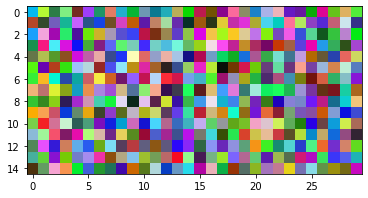

In [ ]:
# Let's have a look at the beautiful image we created
plt_img_tensor(img)

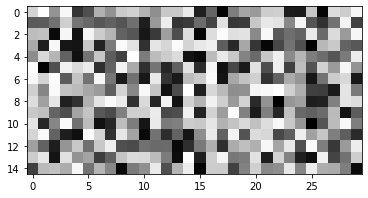

torch.Size([15, 30])


In [ ]:
# As the first dimension is the colour channels, we can view just the green channel
# by indexing into the first dimension
green_channel = img[1]
plt_img_tensor(green_channel)
print(green_channel.shape)

#### Exercise 6
<font color='red'>In the next cell, store the blue channel of the image in a tensor called `blue_channel`.</font>

_Ensure that you re-run the cell containing your solution any time you make changes._

torch.Size([15, 30])


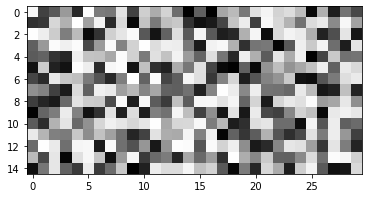

In [ ]:
# TODO: Code your solution here

# SOLUTION:
blue_channel = img[2]
print(blue_channel.shape)

In [ ]:
# Test your solution here
print(blue_channel.shape == (height, width))  # Should output True

# Note that the above test doesn't confirm that you have the right colour channel,
# only that you have *a* colour channel.

True


In [ ]:
# Let's try accessing values of specific pixels
# First, we'll access the green value of the top-left pixel (second colour-channel, first row, first column)
green_first_row = green_channel[0]
green_first_pixel = green_first_row[0]
print(green_first_pixel)

# We can access the same information using a single line
print(img[1, 0, 0])

tensor(0.9503)
tensor(0.9503)


In [ ]:
# We've now seen how to access a row of green values, but how would we get all
# RGB values for an entire row? Torch allows us to skip indexing on a dimension,
# effectively saying "give me everything in this dimension".

# Let's start with a simpler example before we return to the image.
# We'll begin with a 3x3 matrix
square_mat = torch.rand(3, 3)
print(square_mat)

# We can easily take the first row
print(square_mat[0])

# How do we take the first column? 
# Remember how we saw the ':' symbol to take a slice? If we don't provide a start
# or end index, we actually ask for *all* of the values in that dimension!

# So here we use the symbol to take everything in the first dimension, then
# choose an index in the second (column) dimension. This gives us a column
print(square_mat[:, 0])

# Note that it will appear as a row when printed to the screen, but the
# important thing is that we have the values of the column we wanted.

tensor([[0.8483, 0.3618, 0.5887],
        [0.9066, 0.3573, 0.3920],
        [0.4713, 0.3451, 0.4211]])
tensor([0.8483, 0.3618, 0.5887])
tensor([0.8483, 0.9066, 0.4713])


In [ ]:
# Back to the image example, how would we extract the first row of RGB values?
# Think about it in terms of what each dimension represents
# The first dimension is the colour channels - we want all of them (:)
# The second dimension is the rows - we want the first row (0)
# The third dimension is the columns - we want all of them (:)
rgb_row = img[:, 0, :]
print(rgb_row.shape)

# Great! We have a 3x30 matrix, which is num_channels x width.
# However, we can write it in a slightly simpler way - we don't need to specify that we want everything
# in the last dimension, as this is the default behaviour.
rgb_row = img[:, 0]

torch.Size([3, 30])


<font color='red'>The next cell, extracts the RGB values of the first column of the image and stores it in a variable called `rgb_col`.</font> \

_Ensure that you re-run the cell containing your solution any time you make changes._

In [ ]:

rgb_col = img[:, :, 0]
print(rgb_col.shape == (num_channels, height))  

True


#### Exercise 7
<font color='red'>In the next cell, extract the RGB values of the *last* column of the image and store it in a variable called `rgb_col`. Hint the solution is really similar to the previous cell.</font> \
Remember _negative_ indexing?

_Ensure that you re-run the cell containing your solution any time you make changes._

In [ ]:
# TODO: Code your solution here

# SOLUTION
rgb_col = img[:, :, -1]

In [ ]:
# Test your solution here
print(rgb_col.shape == (num_channels, height))  # Should output True

# Note that the above test doesn't confirm that you have the right column, only that you have *a* column.

True


#### Exercise 8 (Challenge)
<font color='red'>In the next cell, add another row of random RGB data to the image, and store the new image in a variable called `new_img`.</font> \
You'll need to:
- Figure out the required shape of the new row
- Create random values of that shape
- Concatenate the new values to the image

_Ensure that you re-run the cell containing your solution any time you make changes._

In [ ]:
# TODO: Code your solution here

# SOLUTION
new_row = torch.rand(num_channels, 1, width)
new_img = torch.cat((img, new_row), 1)

True


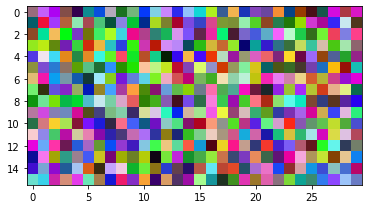

In [ ]:
# Test your solution here
print(new_img.shape == (num_channels, height + 1, width))  # Should output True

# View the new image
plt_img_tensor(new_img)